# Node outage statistics

1. read all files and store data on a ndarray
2. calculate total availability
 * number of nodes
 * number of days 
 * total availability (%) 
3. perform single node statistics plot 

Check #TODO lines and make the necessary changes 

## 1. read files

In [1]:
%pwd

'/home/mirko/lavoro/formazione/attiva/corso_python/OGS/lectures/material'

In [7]:
# user defined variables
# DATA_DIR points to data directory 
DATA_DIR = './data/stats'    # e.g.  ./data

In [9]:
# read file names using glob function 
from glob import glob
file_names = glob(DATA_DIR+'/*') 

file_names.sort()
file_names
# in case file_names is void, please adjust DATA_DIR

['./data/stats/20150901.pbsnodes',
 './data/stats/20150902.pbsnodes',
 './data/stats/20150903.pbsnodes',
 './data/stats/20150904.pbsnodes',
 './data/stats/20150905.pbsnodes',
 './data/stats/20150906.pbsnodes',
 './data/stats/20150907.pbsnodes',
 './data/stats/20150908.pbsnodes',
 './data/stats/20150909.pbsnodes',
 './data/stats/20150910.pbsnodes',
 './data/stats/20150911.pbsnodes',
 './data/stats/20150912.pbsnodes',
 './data/stats/20150913.pbsnodes',
 './data/stats/20150914.pbsnodes',
 './data/stats/20150915.pbsnodes',
 './data/stats/20150916.pbsnodes']

In [3]:
# import numpy in the current namespace
import numpy as np

In [30]:
# define data type to read these lines
# 2015-09-01 00:00:01;node027;1;free;xagi scalar;16
# we are only interested in the first 4 fields
dt = np.dtype([('date', 'S19'), ('node', 'S7'), ('status', np.int), ('occupancy', 'S20')])

In [31]:
# read first file 
data_array = np.loadtxt(file_names[0], dtype=dt, delimiter=';')
# check it
data_array

array([(b'2015-09-01 00:00:01', b'node001', 1, b'free'),
       (b'2015-09-01 00:00:01', b'node002', 1, b'job-busy'),
       (b'2015-09-01 00:00:01', b'node003', 1, b'free'), ...,
       (b'2015-09-01 23:30:01', b'node170', 1, b'free'),
       (b'2015-09-01 23:30:01', b'node165', 1, b'free'),
       (b'2015-09-01 23:30:01', b'node166', 1, b'free')], 
      dtype=[('date', 'S19'), ('node', 'S7'), ('status', '<i4'), ('occupancy', 'S20')])

In [32]:
# now append all the other files data
for file_name in file_names[1:]:
    arr = np.loadtxt(file_names[0], dtype=dt, delimiter=';')
    data_array = np.append(data_array, arr)

In [33]:
# check first elements of data_array
data_array[:6]

array([(b'2015-09-01 00:00:01', b'node001', 1, b'free'),
       (b'2015-09-01 00:00:01', b'node002', 1, b'job-busy'),
       (b'2015-09-01 00:00:01', b'node003', 1, b'free'),
       (b'2015-09-01 00:00:01', b'node004', 1, b'free'),
       (b'2015-09-01 00:00:01', b'node005', 1, b'job-busy'),
       (b'2015-09-01 00:00:01', b'node006', 1, b'job-busy')], 
      dtype=[('date', 'S19'), ('node', 'S7'), ('status', '<i4'), ('occupancy', 'S20')])

In [34]:
# check size of array
assert data_array.size == 400896

## 2. Calculate overall node availability

In [35]:
# get node names
# TODO nodes = np.unique(...)
nodes = np.unique(data_array['node'])
nodes[:5]

array([b'node001', b'node002', b'node003', b'node004', b'node005'], 
      dtype='|S7')

In [39]:
# print total availability of the HPC system
def total_availability(array):
    """ for each 'up' state we consider 30 minutes of uptime."""
    # remember each up state is 1, down state 0
    return array['status'].sum()

up_states = total_availability(data_array)
up_time = up_states/2.0
number_of_nodes = nodes.size
number_of_days = len(file_names)

# availability % is:
#   up_time (hh) / (number_of_nodes * number_of_days * 24) * 100 
total_availability_percentage = up_time  / (number_of_nodes * number_of_days * 24) * 100

print('*'*30)
print('Number of nodes: %d' % number_of_nodes)
print('Number of days: %d' % number_of_days)
print('up states: %7d' % up_states )
print('approximate up time (hh):  %7.1f' % up_time)
print('total availability: %3.1f %% ' % total_availability_percentage)
print('*'*30)

******************************
Number of nodes: 522
Number of days: 16
up states:  397664
approximate up time (hh):  198832.0
total availability: 99.2 % 
******************************


## 3. Single node availability plot

In [49]:
def availability(node):
    """ return node availability (status) array."""
    # first select only 'node' elements of the array 
    arr = data_array['node'] == node
    #  now return only array of status
    return data_array[arr]['status'] 

availability(b'node001').size

768

In [50]:
import matplotlib.pyplot as plt

In [51]:
# show the plots inline
%matplotlib inline

In [52]:
# total hours
total_hours = number_of_days*24

In [53]:
# build an array to be the time (x) axis
time = np.linspace(0, total_hours, 768)

In [56]:
def plot_node_availability(x, plots):
    """ multiplot of node availability  
        plots is a list of 4 ndarrays corresponding to 4 different y axis 
    """
    fig = plt.figure()
    # we need to add one or more subplot
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)
    
    # let's fill the subplot
    ax1.plot(x, plots[0])
    ax2.plot(x, plots[1])
    ax3.plot(x, plots[2])
    ax4.plot(x, plots[3])
    
    # set y range for a better view of the data
    ax1.set_ylim(-0.5, 1.5)
    ax2.set_ylim(-0.5, 1.5)
    ax3.set_ylim(-0.5, 1.5)
    ax4.set_ylim(-0.5, 1.5)
    
    plt.show()

b'node101'
b'node102'
b'node103'
b'node104'


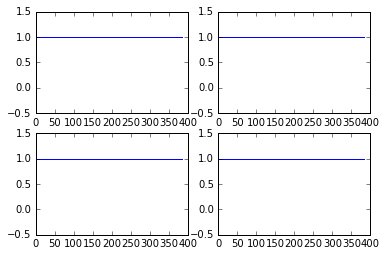

b'node105'
b'node106'
b'node107'
b'node108'


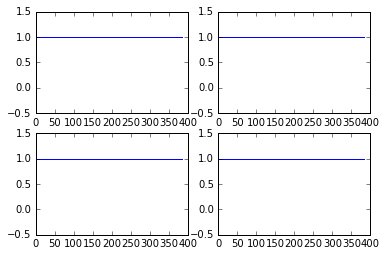

b'node109'
b'node110'
b'node111'
b'node112'


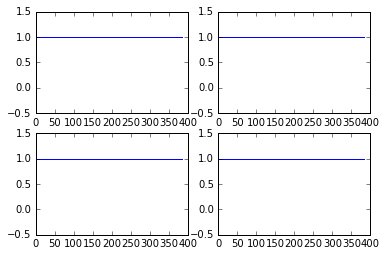

b'node113'
b'node114'
b'node115'
b'node116'


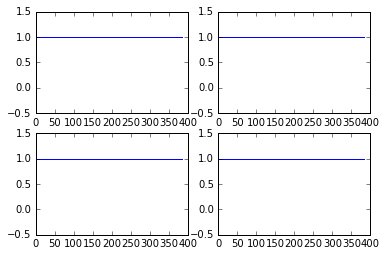

b'node117'
b'node118'
b'node119'
b'node120'


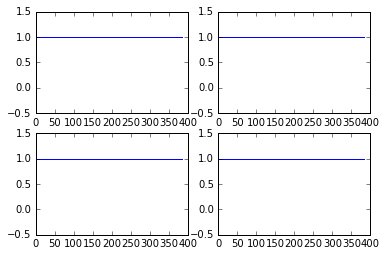

b'node121'
b'node122'
b'node123'
b'node124'


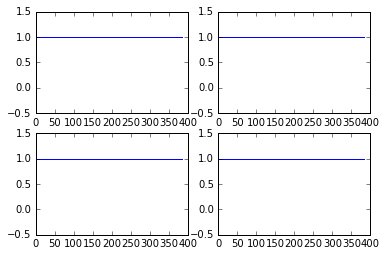

b'node125'
b'node126'
b'node127'
b'node128'


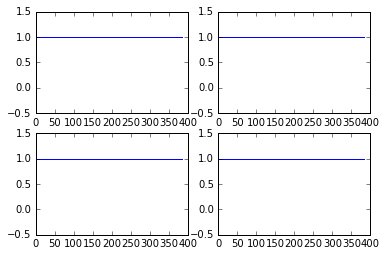

b'node129'
b'node130'
b'node131'
b'node132'


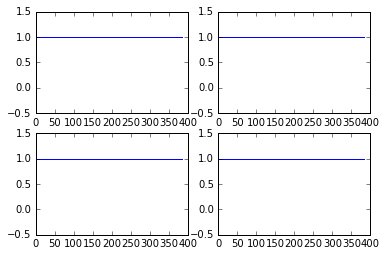

b'node133'
b'node134'
b'node135'
b'node136'


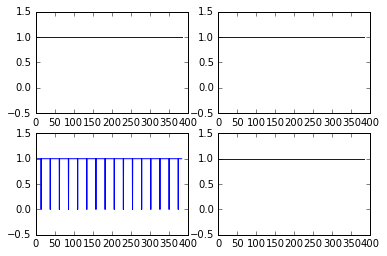

b'node137'
b'node138'
b'node139'
b'node140'


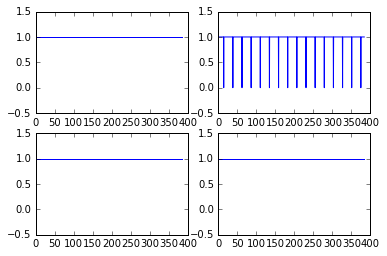

b'node141'
b'node142'
b'node143'
b'node144'


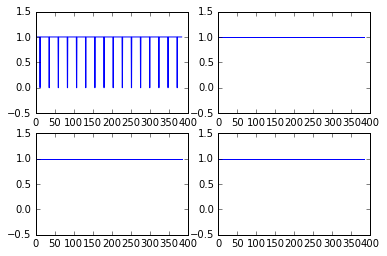

b'node145'
b'node146'
b'node147'
b'node148'


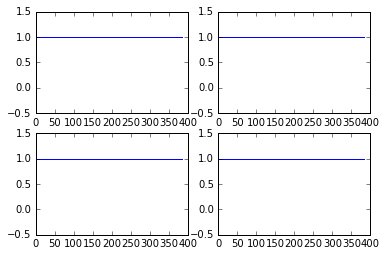

b'node149'
b'node150'
b'node151'
b'node152'


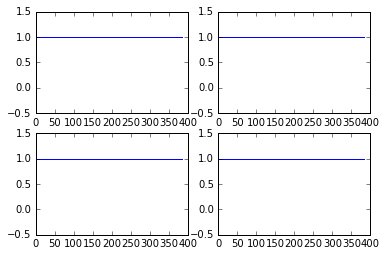

In [57]:
for i in range(100, 150, 4): 
    node_plots = [availability(node) for node in nodes[i:i+4]]
    for node_name in nodes[i:i+4]:
        print(node_name,) 
    plot_node_availability(time, node_plots)